## Imports

In [51]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Define Functions

In [30]:
# define evaluation function
def evaluate(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    
    print("Accuracy:    ", accuracy)
    print("F1-Score:    ", f1)
    print("Precision:   ", precision)
    print("Recall:      ", recall)
    print()
    print(classification_report(y_test, y_pred))
    print()

    disp.plot()

## Load .csv into df


In [31]:
# load data into dataframe
df = pd.read_csv("phishing_email_projectthesis.csv") 

## View and Prepare Data

In [32]:
# rename columns
df = df.rename(columns={'text_combined': 'content'}).rename(columns={'label': 'target'}) 

In [33]:
df.shape 

(82486, 2)

In [34]:
# show all duplicated rows
print(df[df.duplicated(keep=False)]) 

                                                 content  target
17     noms actual vols 3 26 01 eileen gas control re...       0
18     noms actual vols 3 26 01 eileen gas control re...       0
22     enron hpl actuals march 28 2001 estimated actu...       0
23     enron hpl actuals march 28 2001 estimated actu...       0
27     nom vols 3 24 thru 3 26 01 agree eileen ponton...       0
...                                                  ...     ...
80219  nan attn may conceren dear one christ good day...       1
80230  mrwilson ogodi wilson_ogodi0232000yahoocojp 新し...       1
80231  mrwilson ogodi wilson_ogodi0232000yahoocojp 新し...       1
80808  dr ahmed hassan ahassan1696gmailcom kind atten...       1
80809  dr ahmed hassan ahassan1696gmailcom kind atten...       1

[815 rows x 2 columns]


In [35]:
# drop duplicates but keep the first
df = df.drop_duplicates(keep='first') 

In [36]:
df.shape

(82078, 2)

In [37]:
# show data types and number of rows
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 82078 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  82078 non-null  object
 1   target   82078 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [38]:
# show the first 20 rows
df.head(20) 

,content,target
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
5,hpl nom may 31 2001 see attached file hplno 53...,0
6,9760 tried get fancy address came back forward...,0
7,hpl noms february 15 2000 see attached file hp...,0
8,fw pooling contract template original message ...,0
9,hpl nom march 28 2000 see attached file hplo 3...,0


In [39]:
# check for missing values
df.isnull().sum() 

content    0
target     0
dtype: int64

In [40]:
# average number of numbers and letters in one mail
df['content'].apply(len).mean() 

np.float64(1290.495869782402)

In [41]:
# average number of words in one mail
df['content'].apply(lambda x: len(x.split())).mean() 

np.float64(160.71500280221252)

Text(0.5, 1.0, 'Balance')

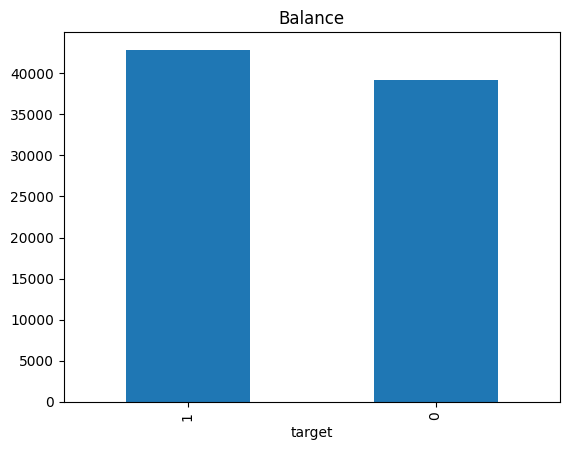

In [42]:
# bar chart showing the balance between 1 and 0
df['target'].value_counts().plot(kind='bar') 
plt.title('Balance')

In [43]:
# get the exact balance
df['target'].value_counts()

target
1    42845
0    39233
Name: count, dtype: int64

In [44]:
# randomized undersampling
df = df.groupby('target').apply(lambda x: x.sample(39233, replace=True)).reset_index(drop=True)

/var/folders/gr/nkq2fp191y1_3wywjp14_sz00000gn/T/ipykernel_95962/196238678.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('target').apply(lambda x: x.sample(39233, replace=True)).reset_index(drop=True)


In [45]:
# get the exact balance
df['target'].value_counts()

target
0    39233
1    39233
Name: count, dtype: int64

Text(0.5, 1.0, 'Balance')

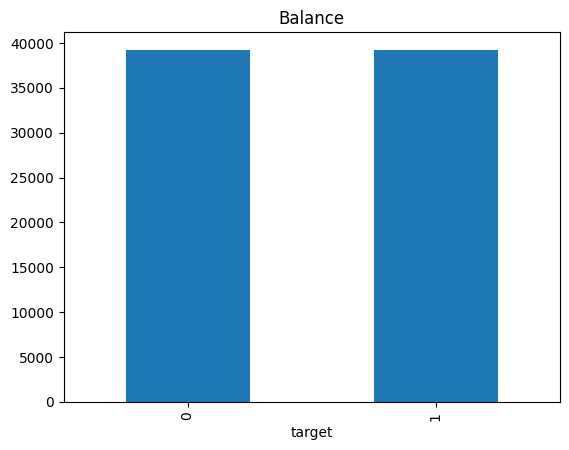

In [46]:
# bar chart showing the balance between 1 and 0
df['target'].value_counts().plot(kind='bar') 
plt.title('Balance')

## Split Data into Training and Test 80-20

In [47]:

# define X and Y
X = df['content']
y = df['target']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (62772,)
Shape of X_test: (15694,)
Shape of y_train: (62772,)
Shape of y_test: (15694,)


# Vectorization with TF-IDF

## Vectorization with TF-IDF

In [48]:
# creating vectorizer with standart parameters
vectorizer = TfidfVectorizer()

# fit on and tranform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# transform test data 
X_test_tfidf = vectorizer.transform(X_test)

# check the shape
print("Shape of X_train_vect:", X_train_tfidf.shape)
print("Shape of X_test_vect:", X_test_tfidf.shape)

# print feature names
print("Feature Names: ")
print(vectorizer.get_feature_names_out())

Shape of X_train_vect: (62772, 369675)
Shape of X_test_vect: (15694, 369675)
Feature Names: 
['00' '000' '0000' ... '𝗐𝗈𝗋𝗄' '𝗒𝗈𝗎' '𝗒𝗈𝗎𝗋']


## Dummy Classifier

Accuracy:     0.497260099401045
F1-Score:     0.4953306895228348
Precision:    0.49602869587496795
Recall:       0.49463464486458864

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      7866
           1       0.50      0.49      0.50      7828

    accuracy                           0.50     15694
   macro avg       0.50      0.50      0.50     15694
weighted avg       0.50      0.50      0.50     15694




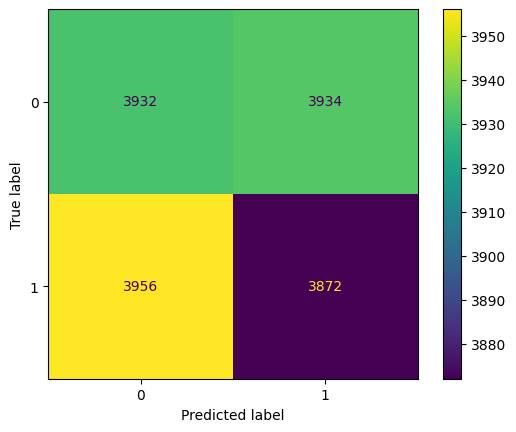

In [23]:
# creating classifier object with 'most_frequent'-strategy
dummy_tfidf_classifier = DummyClassifier(strategy='uniform', random_state=42)

# train classifier
dummy_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
dummy_tfidf_predictions = dummy_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(dummy_tfidf_predictions)

## Random Forest

Accuracy:     0.9899961768828852
F1-Score:     0.9899391220762576
Precision:    0.9931850327889932
Recall:       0.9867143587123147

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7866
           1       0.99      0.99      0.99      7828

    accuracy                           0.99     15694
   macro avg       0.99      0.99      0.99     15694
weighted avg       0.99      0.99      0.99     15694




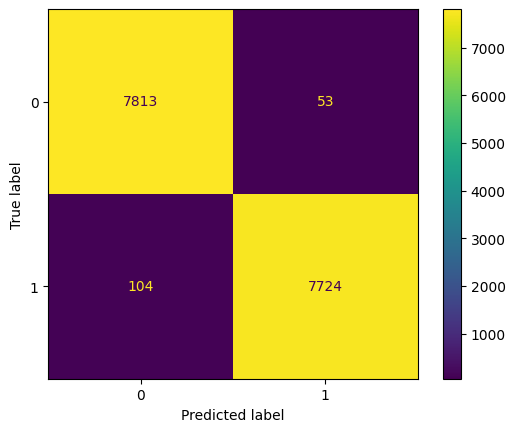

In [81]:
# create classifier object
rf_tfidf_classifier = RandomForestClassifier(random_state=42)

# train classifier
rf_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
rf_tfidf_predictions = rf_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(rf_tfidf_predictions)

## Logistic Regression

Accuracy:     0.9899961768828852
F1-Score:     0.9899750973756465
Precision:    0.9896591344312524
Recall:       0.9902912621359223

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7866
           1       0.99      0.99      0.99      7828

    accuracy                           0.99     15694
   macro avg       0.99      0.99      0.99     15694
weighted avg       0.99      0.99      0.99     15694




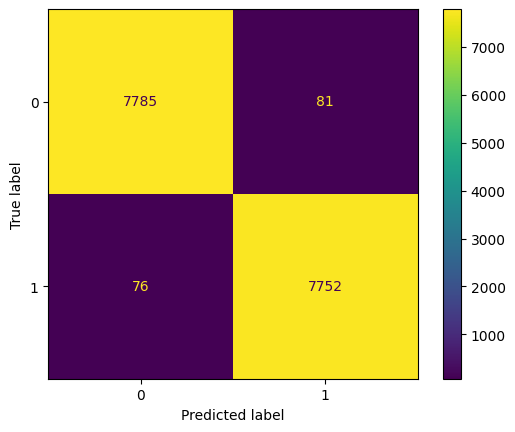

In [24]:
# create classifier object
logreg_tfidf_classifier = LogisticRegression(max_iter=10000, random_state=42)

# train classifier
logreg_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
logreg_tfidf_predictions = logreg_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(logreg_tfidf_predictions)

## Support Vector Machine

### Linear

Accuracy:     0.9933732636676437
F1-Score:     0.9933622670411029
Precision:    0.9926020408163265
Recall:       0.9941236586612161

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7866
           1       0.99      0.99      0.99      7828

    accuracy                           0.99     15694
   macro avg       0.99      0.99      0.99     15694
weighted avg       0.99      0.99      0.99     15694




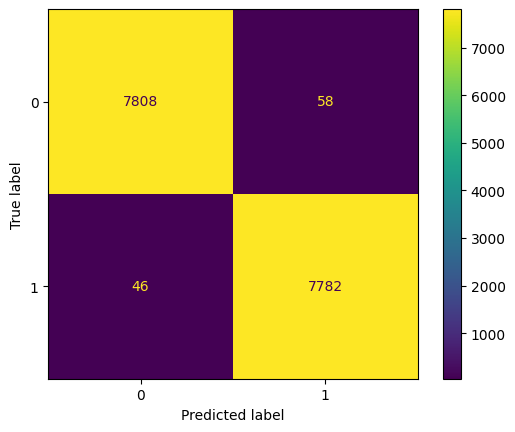

In [26]:
# create classifier object
linsvm_tfidf_classifier = SVC(kernel="linear", random_state=42)

# train classifier
linsvm_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
linsvm_tfidf_prediction = linsvm_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(linsvm_tfidf_prediction)

### Poly

In [27]:
# create classifier object
linsvm_tfidf_classifier = SVC(kernel="poly", random_state=42)

# train classifier
linsvm_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
linsvm_tfidf_prediction = linsvm_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(linsvm_tfidf_prediction)

## Multinomial Naive Bayes

Accuracy:     0.9778896393526189
F1-Score:     0.9774455638609035
Precision:    0.9949715495567024
Recall:       0.9605263157894737

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7866
           1       0.99      0.96      0.98      7828

    accuracy                           0.98     15694
   macro avg       0.98      0.98      0.98     15694
weighted avg       0.98      0.98      0.98     15694




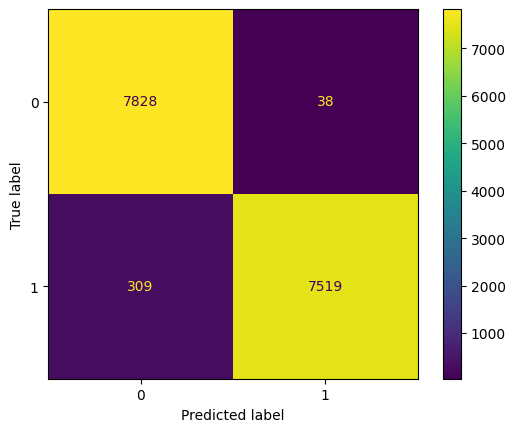

In [26]:
# create classifier object
mnb_tfidf_classifier = MultinomialNB()

# train classifier
mnb_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mnb_tfidf_prediction = mnb_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mnb_tfidf_prediction)

## K-Nearest-Neighbors

Accuracy:     0.6948515356187078
F1-Score:     0.7656930378198542
Precision:    0.6204900483704702
Recall:       0.9996167603474706

              precision    recall  f1-score   support

           0       1.00      0.39      0.56      7866
           1       0.62      1.00      0.77      7828

    accuracy                           0.69     15694
   macro avg       0.81      0.70      0.66     15694
weighted avg       0.81      0.69      0.66     15694




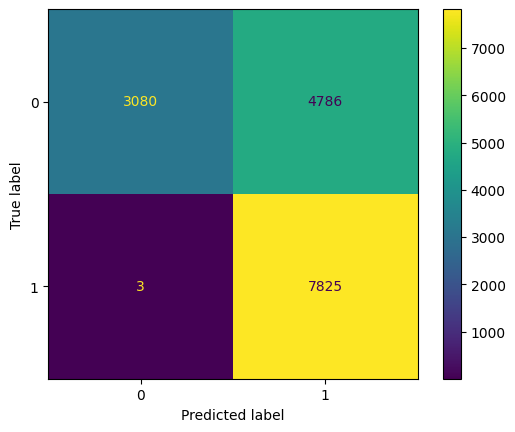

In [50]:
# create classifier object
knn_tfidf_classifier = KNeighborsClassifier()

# train classifier
knn_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
knn_tfidf_prediction = knn_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(knn_tfidf_prediction)


## Gradient Boosting Machine

Accuracy:     0.9431629922263285
F1-Score:     0.9439205331321514
Precision:    0.9293141866798712
Recall:       0.9589933571793562

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7866
           1       0.93      0.96      0.94      7828

    accuracy                           0.94     15694
   macro avg       0.94      0.94      0.94     15694
weighted avg       0.94      0.94      0.94     15694




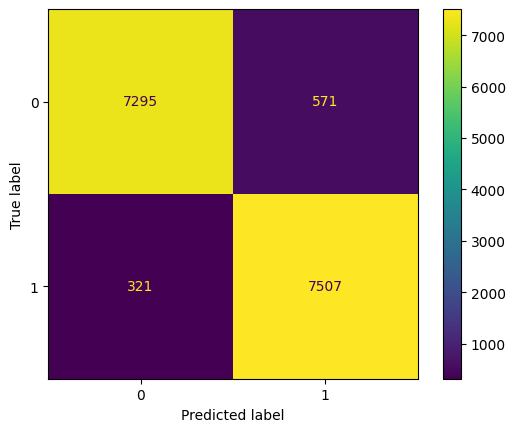

In [52]:
# create classifier object
gbm_tfidf_classifier = GradientBoostingClassifier(random_state=42)

# train classifier
gbm_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
gbm_tfidf_prediction = gbm_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(gbm_tfidf_prediction)